# **Solution to Inaugural Project 2024**
By Anna Abildskov, Emma Knippel and Oscar Nyholm

# Table of contents
* [Setup](#toc0_)   

* [Question 1: Edgeworth Box](#toc1_) 

* [Question 2: Market Clearing Error](#toc2_)    

* [Question 3: Market Clearing Price](#toc3_)    

* [Question 4: A as Price Setter](#toc4_)   

* [Question 5: A as Market Maker](#toc5_) 

* [Question 6: Utalitarian Social Planner](#toc6_) 

* [Question 7: Random Draw](#toc7_) 

* [Question 8: Market Equilibrium](#toc8_) 



## <a id='toc0_'></a>[Setup](#toc0_)

Imports and set magics:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import ExchangeEconomyClass

## <a id='toc1_'></a>[Question 1: Edgeworth Box](#toc1_)

**1.1 Illustrating the endowment in the edgeworth box**

First, we utilize the code provided to illustrate the endowments for both A and B in the edgeworth box. 

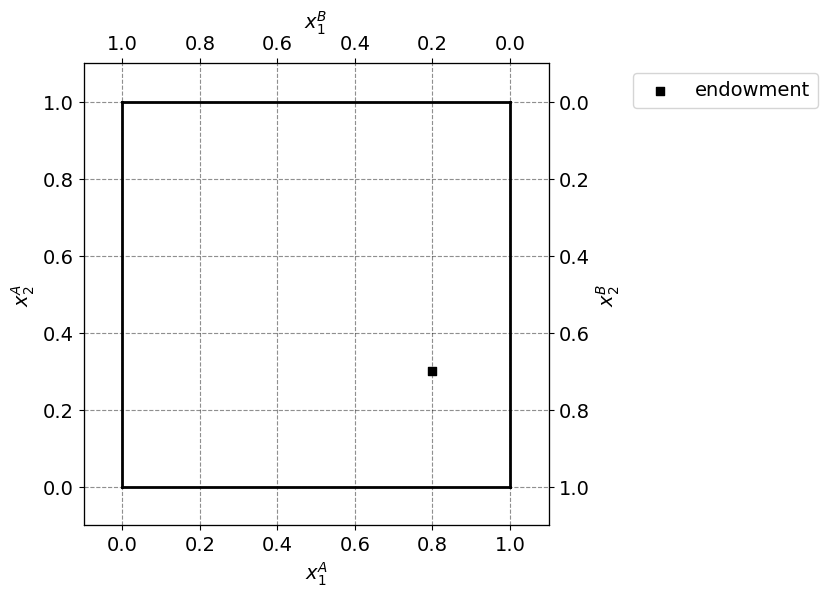

In [3]:
model = ExchangeEconomyClass()
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

**1.2 Illustrating the consumption sets for pareto improvement**

In the edgeworth box, we plot all the combinations of $x_1^A$ and $x_2^A$ (when $x_1^B$ $\equiv$ $(1-x_1^A)$ and $x_2^B$ is $\equiv$ $(1-x_2^A)$) that yield a pareto improvement in utility from the starting point of A and B consuming their respective endowments. We do this by creating a nested loop over all N values of $x_1^A$ and $x_2^A$ in {$0, \frac{1}{N}, \frac{2}{N},..,N$} and adding them pairwise to a list if they satisfy both of the following conditions conditions:

$$\begin{aligned} 
u^A(x_1^A,x_2^A)≥u^A(\omega_1^A,\omega_2^A)\\
u^B(x_1^B,x_2^B)≥u^B(\omega_1^B,\omega_3^B)
\end{aligned}$$

Then, we introduce the value-pairs to the edgeworth box, marked as "Pareto improvements".


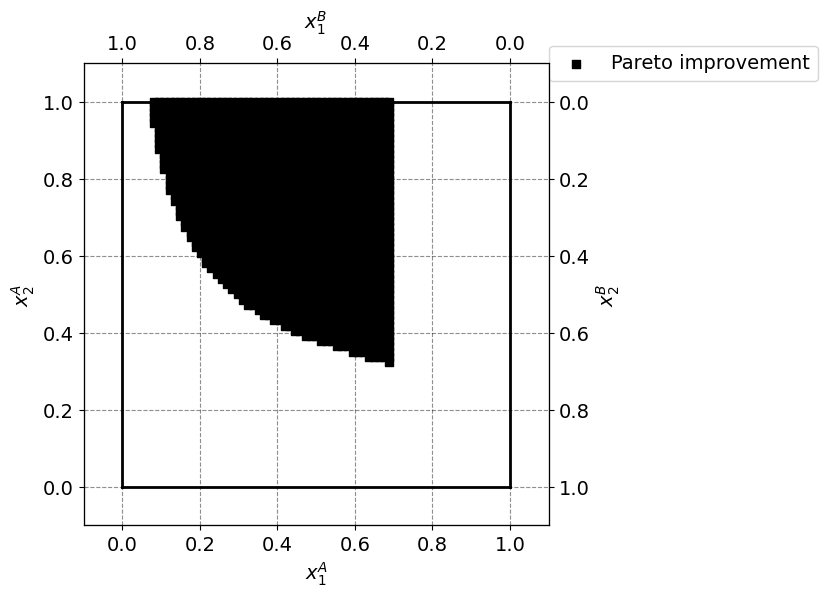

In [4]:
pareto_pairs = model.pareto_improvement()

x1A_values = [pair[0] for pair in pareto_pairs]
x2A_values = [pair[1] for pair in pareto_pairs]

fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

ax_A.scatter(x1A_values, x2A_values,marker='s',color='black',label='Pareto improvement')

ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='center right',bbox_to_anchor=(1.6,1.0));

## <a id='toc2_'></a>[Question 2: Market Clearing Error](#toc2_)

**2.1 Printing market clearing errors**

To calculate the market clearing errors for $p_1$ $\in$ $\mathcal{P}_1$ = {$0.5, 0.5+2\frac{1}{N},0.5+2\frac{2}{N},...,2.5$}, we loop over the values and save the errors to a list. The first five value pairs in the list are presented below.

The first five value pars are: [(0.533333333333333, -0.2666666666666666), (0.47521367521367497, -0.2504504504504504), (0.4227642276422763, -0.23423423423423412), (0.3751937984496123, -0.2180180180180178), (0.33185185185185173, -0.20180180180180163)]


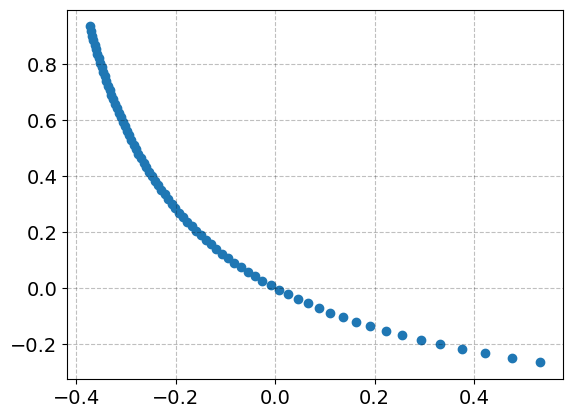

In [5]:
eps_values = model.market_clearing_error()

print('The first five value pars are:', eps_values[:5])

eps1 = [pair[0] for pair in eps_values]
eps2 = [pair[1] for pair in eps_values]
plt.scatter(eps1,eps2)

## <a id='toc3_'></a>[Question 3: Market Clearing Price](#toc3_)

Explain your code and procedure

In [57]:
market_clearing_price = model.market_clearing_price()[0]

print(f'The market clearing price is {market_clearing_price:.3f}')

The market clearing price is 0.943


## <a id='toc4_'></a>[Question 4: A as Price Setter](#toc4_)

## <a id='toc5_'></a>[Question 5: A as Market Maker](#toc5_)

## <a id='toc6_'></a>[Question 6: Utalitarian Social Planner](#toc6_)

## <a id='toc7_'></a>[Question 7: Random Draw](#toc7_)

## <a id='toc8_'></a>[Question 8: Market Equilibrium](#toc8_)

ADD CONCISE CONLUSION.